In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df['type'] = data.target

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df['flower name'] = np.where(df['type'] == 0, 'setosa', np.where(df['type'] == 1, 'versicolor', 'virginica'))
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop(['type','flower name'],axis=1)
y = df['type']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.metrics import mean_squared_error

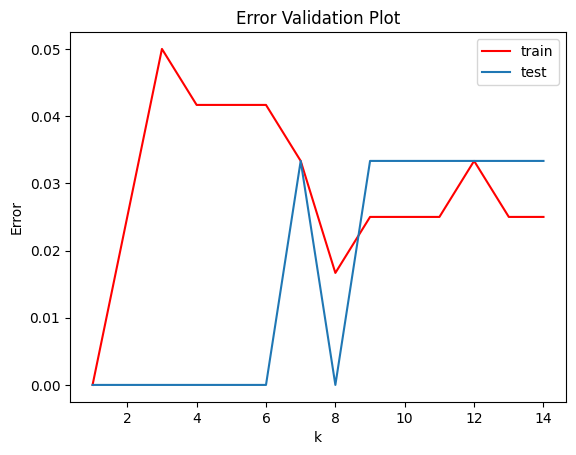

In [15]:
error_values1 = []
error_values2 = []
k_values = range(1,15)  # iterate over k values from 1 to 20

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred1 = knn.predict(X_train)
    error_values1.append(np.mean(y_train!=y_pred1))
    y_pred2 = knn.predict(X_test)
    error_values2.append(np.mean(y_test!=y_pred2))
plt.plot(k_values,error_values1,color='red')
plt.plot(k_values, error_values2)
plt.xlabel('k')
plt.ylabel('Error')
plt.title('Error Validation Plot')
plt.legend(['train','test'])
plt.show()



In [16]:
model = KNeighborsClassifier(n_neighbors=8)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_test==y_pred)
accuracy

1.0

In [17]:
target = model.predict([[4.8,3.0,1.5,0.3]])
target

c:\Users\vigne\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_pred,y_test)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(50.722222222222214, 0.5, 'Truth')

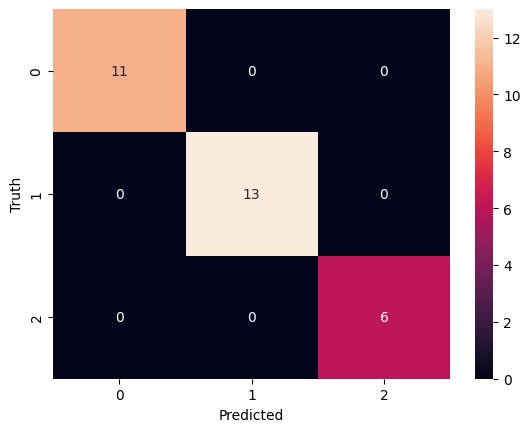

In [20]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
from sklearn.metrics import classification_report

In [22]:
report = classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

